In [5]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


In [6]:
dataset_path = r"C:\Users\parma\Downloads\Image Dataset of Indian Coins\Image Dataset of Indian Coins\Indian Coins Image Dataset\Indian Coins Image Dataset"
train_path = r"C:\Users\parma\Downloads\Image Dataset of Indian Coins\train"
val_path = r"C:\Users\parma\Downloads\Image Dataset of Indian Coins\val"
test_path = r"C:\Users\parma\Downloads\Image Dataset of Indian Coins\test"


In [7]:
# Create directories
for folder in ['train', 'val', 'test']:
    os.makedirs(os.path.join(train_path), exist_ok=True)
    os.makedirs(os.path.join(val_path), exist_ok=True)
    os.makedirs(os.path.join(test_path), exist_ok=True)

# Split dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        # Calculate splits
        train_count = int(len(images) * 0.7)
        val_count = int(len(images) * 0.15)

        # Create class directories
        os.makedirs(os.path.join(train_path, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_folder), exist_ok=True)

        for i, image in enumerate(images):
            src = os.path.join(class_path, image)
            if i < train_count:
                dst = os.path.join(train_path, class_folder, image)
            elif i < train_count + val_count:
                dst = os.path.join(val_path, class_folder, image)
            else:
                dst = os.path.join(test_path, class_folder, image)
            shutil.copy(src, dst)

print("Data split into train, validation, and test sets.")


Data split into train, validation, and test sets.


In [8]:
img_height, img_width = 150, 150  # Adjust as needed
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Change if you use one-hot encoding
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Step 3: Build the CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Adjust for number of classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can increase the number of epochs
)


Found 1103 images belonging to 35 classes.
Found 520 images belonging to 35 classes.
Found 578 images belonging to 35 classes.
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3544 - loss: 2.9754 - val_accuracy: 0.3019 - val_loss: 2.7943
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4989 - loss: 2.0595 - val_accuracy: 0.4942 - val_loss: 1.8925
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6351 - loss: 1.3952 - val_accuracy: 0.7327 - val_loss: 0.9994
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7759 - loss: 0.8111 - val_accuracy: 0.7788 - val_loss: 0.7000
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8757 - loss: 0.4256 - val_accuracy: 0.8981 - val_loss: 0.4277
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9172 - loss: 0.3144 - val_accuracy: 0.9404 - val_loss: 0.2798
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9421 - loss: 0.2286 - val_accuracy: 0.9615 - val_loss

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 426ms/step - accuracy: 0.9846 - loss: 0.0553


Test accuracy: 0.9844290614128113


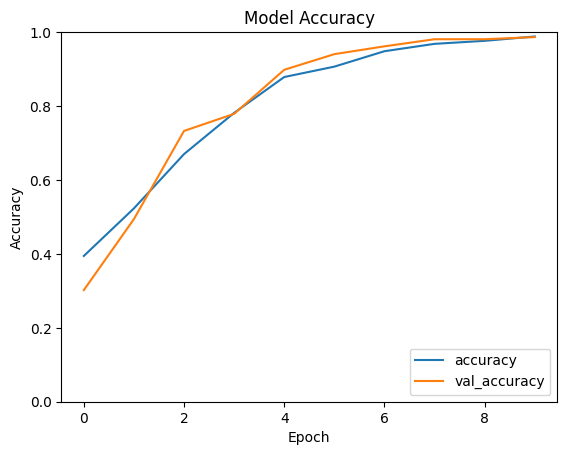

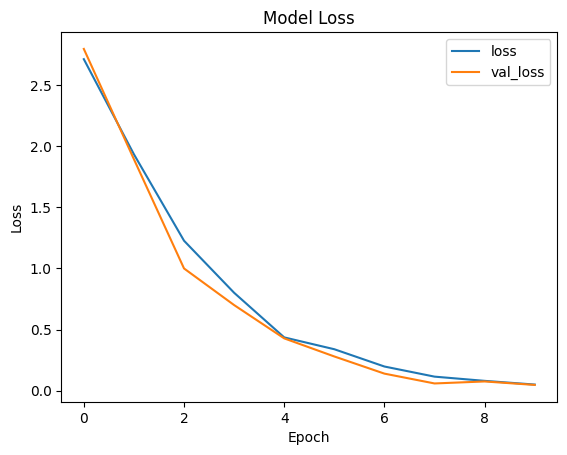

In [11]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

# Step 6: Save the Model

model.save('coin_classification_model.h5')

# Step 7: Visualize Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

In [12]:
# Create a mapping of class indices to class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Invert the mapping

# Function to predict a single image
def predict_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Rescale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_index, predicted_class_name

# Path to your sample image
sample_image_path = r"C:\Users\parma\Downloads\Image Dataset of Indian Coins\Image Dataset of Indian Coins\Indian Coins Image Dataset\50 (2).jpeg"  # Update with your sample image path

predicted_class_index, predicted_class_name = predict_image(sample_image_path)
print(f'Predicted class index: {predicted_class_index}')
print(f'Predicted class name: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class index: 33
Predicted class name: 5cents_us
